In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("titanic_data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


df.set_index("PassengerId",inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1308 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
df["Cabin"]

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,True,False,False,False,False,True,False
1305,False,False,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,True,False,False,False,False,True,False


In [7]:
df["Fare"]

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

## Checking the missing values in the data

<AxesSubplot:>

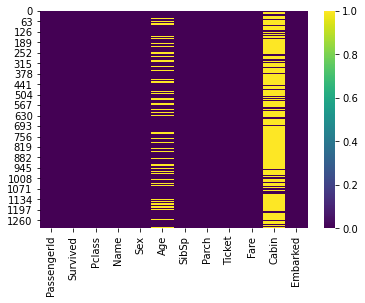

In [8]:
sns.heatmap(df.isnull(),cmap='viridis')

## Checking number of people survived or not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

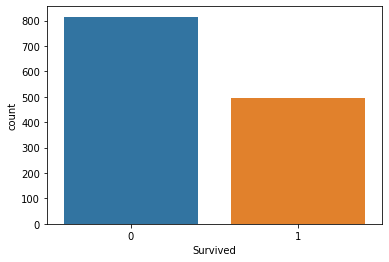

In [9]:
sns.countplot(x="Survived",data=df)

## Checking number of males/females survived/not-survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

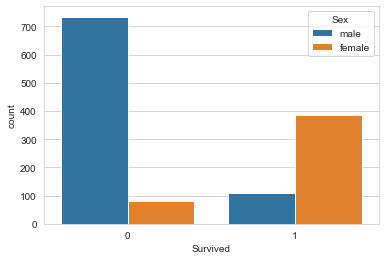

In [10]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Sex" , data=df)

## Checking number of survived/not-survived on the basis of cabin class

<AxesSubplot:xlabel='Survived', ylabel='count'>

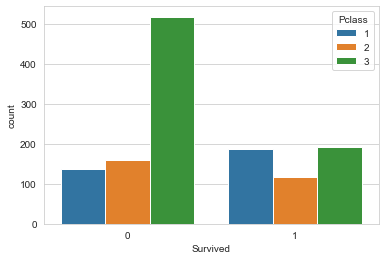

In [11]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Pclass" , data=df)

## Checking the mean age on the basis of cabin class so that we can fill the missing age values on the basis of cabin class to make it more effective 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

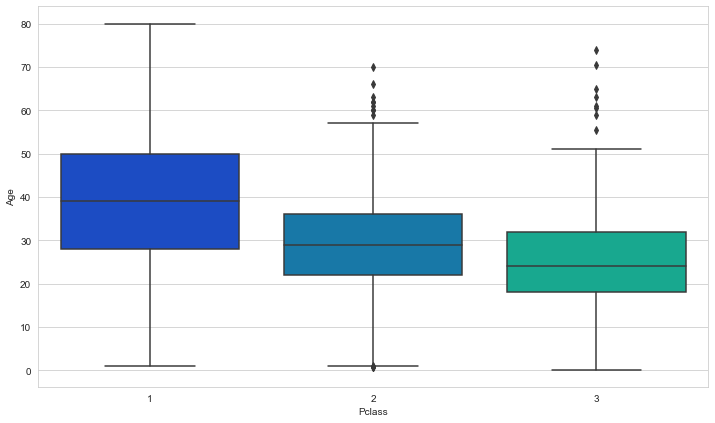

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

## Imputing mean values on the basis of cabin class in the age colums using the impute function 

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
df["Age"] = df[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

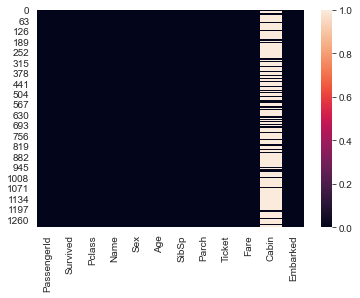

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.Cabin.isnull().sum()

1014

## We have 70-80% missing values in the 'Cabin' colums, Creating a new column named 'Cabin_status' with the values 0 and 1; where 1=cabin status known 0=cabin status not known on the basis of our old column 'Cabin' 

In [17]:
def check_cabin_status(Cabin):
    
    if pd.isnull(Cabin):
        return 0
    else:
        return 1

In [18]:
df["Cabin_status"] = df["Cabin"].apply(check_cabin_status)

In [19]:
df.Cabin_status

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Cabin_status, Length: 1309, dtype: int64

<AxesSubplot:xlabel='Cabin_status', ylabel='count'>

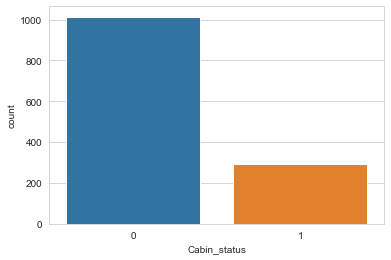

In [20]:
sns.set_style('whitegrid')
sns.countplot(x="Cabin_status",data=df)

In [21]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [22]:
df.drop(["Cabin"],axis=1,inplace=True)
df.drop(["Name"],axis=1,inplace=True)
df.drop(["Ticket"],axis=1,inplace=True)
df.drop(["PassengerId"],axis=1,inplace=True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_status
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


<AxesSubplot:>

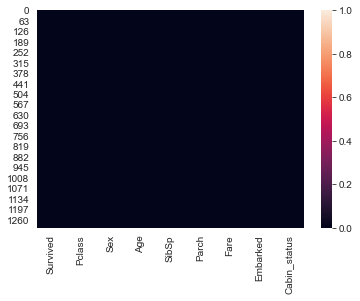

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      1309 non-null   int64  
 1   Pclass        1309 non-null   int64  
 2   Sex           1309 non-null   object 
 3   Age           1309 non-null   float64
 4   SibSp         1309 non-null   int64  
 5   Parch         1309 non-null   int64  
 6   Fare          1308 non-null   float64
 7   Embarked      1308 non-null   object 
 8   Cabin_status  1309 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 92.2+ KB


## Encoding categorical features using LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [27]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_status
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0
5,0,3,1,24.0,0,0,8.4583,1,0
6,0,1,1,54.0,0,0,51.8625,2,1
7,0,3,1,2.0,3,1,21.0750,2,0
8,1,3,0,27.0,0,2,11.1333,2,0
9,1,2,0,14.0,1,0,30.0708,0,0


## Train-Test Splitting & Stratified Shuffling 

In [28]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 1047
Rows in test set: 262



In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Cabin_status']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Survived']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [31]:
strat_test_set['Cabin_status'].value_counts()

0    200
1     62
Name: Cabin_status, dtype: int64

In [32]:
strat_train_set['Cabin_status'].value_counts()

0    814
1    233
Name: Cabin_status, dtype: int64

In [33]:
cor = df.corr()
cor['Survived'].sort_values(ascending=False)

Survived        1.000000
Cabin_status    0.259023
Fare            0.233622
Parch           0.108919
SibSp           0.002370
Age            -0.030473
Embarked       -0.133777
Pclass         -0.264710
Sex            -0.688371
Name: Survived, dtype: float64

In [34]:
df = strat_train_set.drop("Survived", axis=1)
df_labels = strat_train_set["Survived"].copy()

## Model Fitting 

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(df, df_labels)


c:\users\91981\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = model.predict(df)

In [37]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(df)
mse = mean_squared_error(df_labels, predictions)
rmse = np.sqrt(mse)

In [38]:
rmse

0.3695682707988875

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy=accuracy_score(df_labels,predictions)
accuracy

0.8634192932187201

In [41]:
predictions

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [42]:
df_labels

1021    0
318     1
924     1
652     0
1189    0
       ..
268     1
960     1
663     0
1132    1
108     0
Name: Survived, Length: 1047, dtype: int64

In [43]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_status
1021,3,1,32.0,0,0,8.0500,2,0
318,1,0,31.0,0,2,164.8667,2,1
924,3,0,24.0,1,2,23.4500,2,0
652,3,1,21.0,0,0,8.4333,2,0
1189,1,1,30.0,0,0,45.5000,2,0
...,...,...,...,...,...,...,...,...
268,1,0,58.0,0,1,153.4625,2,1
960,1,0,60.0,1,4,263.0000,2,1
663,3,1,36.0,0,0,7.4958,2,0
1132,2,0,45.0,0,2,30.0000,2,0


## Using Model to predict the values of survived/not-survived 

In [44]:
features = np.array([[3,1,38.0,0,0,7.8958,2,0]])
model.predict(features)

array([0], dtype=int64)